### Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

### Specify Parameters

In [47]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
c = 0.5;
phi1 = 0.7;
phi2 = 0.25;
sigmaEps2 = 0.1

### Create Model and Generate One Sample Path

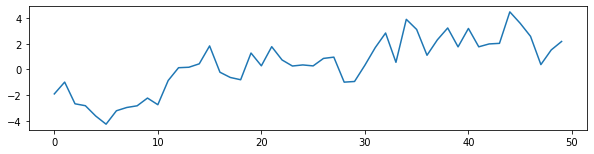

In [121]:
plt.subplot(2, 1, 1)
ar1 = np.array([1, -phi1, -phi2])
ma1 = np.array([1])
Mdl = ArmaProcess(ar1, ma1)
# There is no way to set variance in ArmaProcess.
Y = Mdl.generate_sample(nsample=50)
plt.plot(Y);

### Mean and Variance

In [122]:
mu = c/(1-phi1-phi2)
print(round(mu, 4))

10.0


In [111]:
sigma2 = (1-phi2)/(1+phi2)*sigmaEps2/((1-phi2)**2 - phi1**2)
print(round(sigma2, 4))

0.8276


### Generate Many Sample Paths

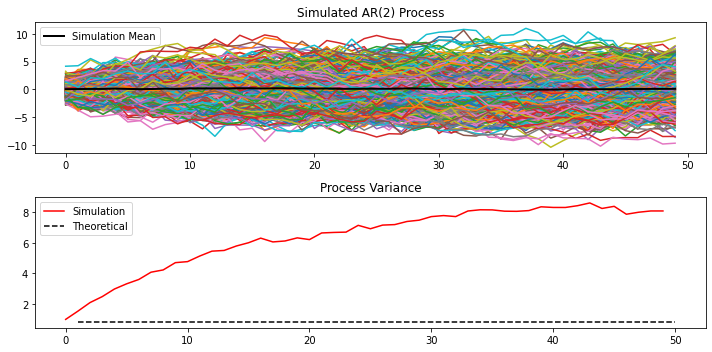

In [123]:
# No way to set variance, therefore simulation and theoretical does not match.
Y = Mdl.generate_sample(nsample=(50, 1000))
plt.subplot(2,1,1)
plt.title('Simulated AR(2) Process')
plt.plot(Y)
plt.plot(np.mean(Y,1),'k', linewidth=2, label="Simulation Mean")
plt.legend()
plt1 = plt.subplot(2,1,2)
plt.title('Process Variance')
plt.plot(np.var(Y,1, ddof=1),'r',linewidth=1.5, label="Simulation")
plt.plot(np.linspace(1,50),sigma2*np.ones((50,1)),'k--',linewidth=1.5, label="Theoretical")
plt.tight_layout()
plt.legend()
plt.show()

### Oversample to Reduce Transient Effects

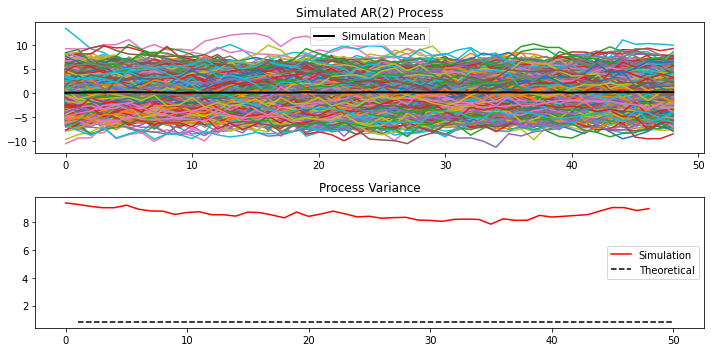

In [125]:
Y = Mdl.generate_sample(nsample=(150, 1000))
Y = Y[101:]

plt.subplot(2,1,1)
plt.title('Simulated AR(2) Process')
plt.plot(Y)
plt.plot(np.mean(Y,1),'k', linewidth=2, label="Simulation Mean")
plt.legend()
plt1 = plt.subplot(2,1,2)
plt.title('Process Variance')
plt.plot(np.var(Y,1, ddof=1),'r',linewidth=1.5, label="Simulation")
plt.plot(np.linspace(1,50),sigma2*np.ones((50,1)),'k--',linewidth=1.5, label="Theoretical")
plt.tight_layout()
plt.legend()
plt.show()